In [1801]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

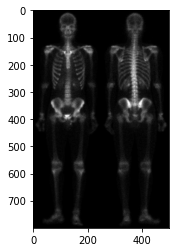

In [1802]:
B = cv2.imread("skeleton.png")
skelet = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
plt.imshow(B)

True

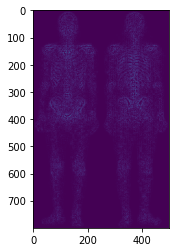

In [1803]:
#laplac=cv2.Laplacian(skelet, -1, 2)
#plt.imshow(laplac)
kernel = np.array([[1, 1, 1], 
                   [1,-8, 1], 
                   [1, 1, 1]])
laplac = cv2.filter2D(skelet,-1,kernel)
plt.imshow(laplac)
cv2.imwrite('2laplac.png',laplac)

True

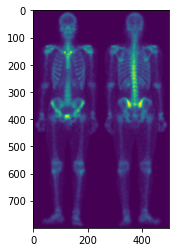

In [1804]:
#laplacian=skelet + laplac
laplacian=cv2.add(skelet, laplac)
plt.imshow(laplacian)
cv2.imwrite('3laplacian.png',laplacian)

True

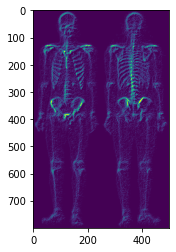

In [1805]:

kernelX = np.array([[-1, -2, -1], 
                   [0,0, 0], 
                   [1, 2, 1]])
kernelY = np.array([[-1, 0, 1], 
                   [-2,0, 2], 
                   [-1, 0, 1]])
#sobelX =cv2.filter2D(skelet,-1,kernelX)
#sobelY=cv2.filter2D(skelet,-1,kernelY)

sobelX =cv2.Sobel(skelet, -1, 1, 0)
sobelY=cv2.Sobel(skelet, -1, 0, 1)

sobel = cv2.add(sobelX, sobelY)
plt.imshow(sobel)
cv2.imwrite('4sobel.png',sobel)

True

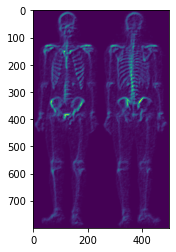

In [1806]:
#усредняющий фильтр
Blur = cv2.blur(sobel, ksize=(5, 5))
#Blur = cv2.medianBlur(sobel, ksize = 5)
plt.imshow(Blur)
cv2.imwrite('5Blur.png',Blur)

True

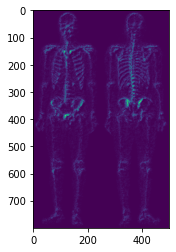

In [1807]:
#перемножение лапласиана и усредняющего фильтра
#mask = laplacian * Blur
#mask = cv2.multiply(laplacian,Blur)
mask = cv2.bitwise_and(laplacian,Blur)
plt.imshow(mask)
cv2.imwrite('6mask.png',mask)

True

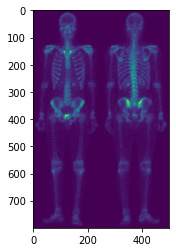

In [1808]:
#sharpness= skelet+mask
sharpness= cv2.add(skelet, mask,dtype= cv2.CV_64F)
plt.imshow(sharpness)
cv2.imwrite('7sharpness.png',sharpness)

True

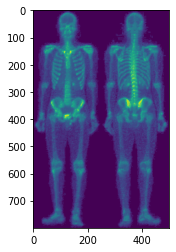

In [1809]:

gammaCorection=cv2.pow(sharpness, 0.5)
plt.imshow(gammaCorection ) 
cv2.imwrite('7gammaCorection.png',gammaCorection)